In [1]:
!pip install pandas-datareader

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [3]:
import pandas_datareader.data as web
start='2015-01-01'
end='2023-01-01'

df=web.DataReader('JPM','stooq',start,end)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-12-30,132.81,134.33,132.44,134.10,9292519.0
2022-12-29,132.93,133.27,132.31,133.22,6585228.0
2022-12-28,131.85,133.41,131.01,132.46,8827738.0
2022-12-27,131.57,132.22,130.55,131.74,5410991.0
2022-12-23,130.58,131.44,129.64,131.28,5091905.0


In [4]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-08,48.2753,49.0259,48.2753,48.6122,2.107993e+07
2015-01-07,48.2143,48.2143,47.2329,47.5512,2.961840e+07
2015-01-06,48.8155,48.9040,46.9735,47.4804,3.611625e+07
2015-01-05,49.9581,50.1369,48.4845,48.7429,2.496834e+07
2015-01-02,50.4111,50.6861,49.9670,50.3059,1.564852e+07


In [5]:
#  Date becomes column and are removable.
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Volume
0,2022-12-30,132.81,134.33,132.44,134.10,9292519.0
1,2022-12-29,132.93,133.27,132.31,133.22,6585228.0
2,2022-12-28,131.85,133.41,131.01,132.46,8827738.0
3,2022-12-27,131.57,132.22,130.55,131.74,5410991.0
4,2022-12-23,130.58,131.44,129.64,131.28,5091905.0


# Information

This code deletes "Date" column from the dataset as they are not useful in our plotting.

In [6]:
df=df.drop(['Date'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,132.81,134.33,132.44,134.10,9292519.0
1,132.93,133.27,132.31,133.22,6585228.0
2,131.85,133.41,131.01,132.46,8827738.0
3,131.57,132.22,130.55,131.74,5410991.0
4,130.58,131.44,129.64,131.28,5091905.0


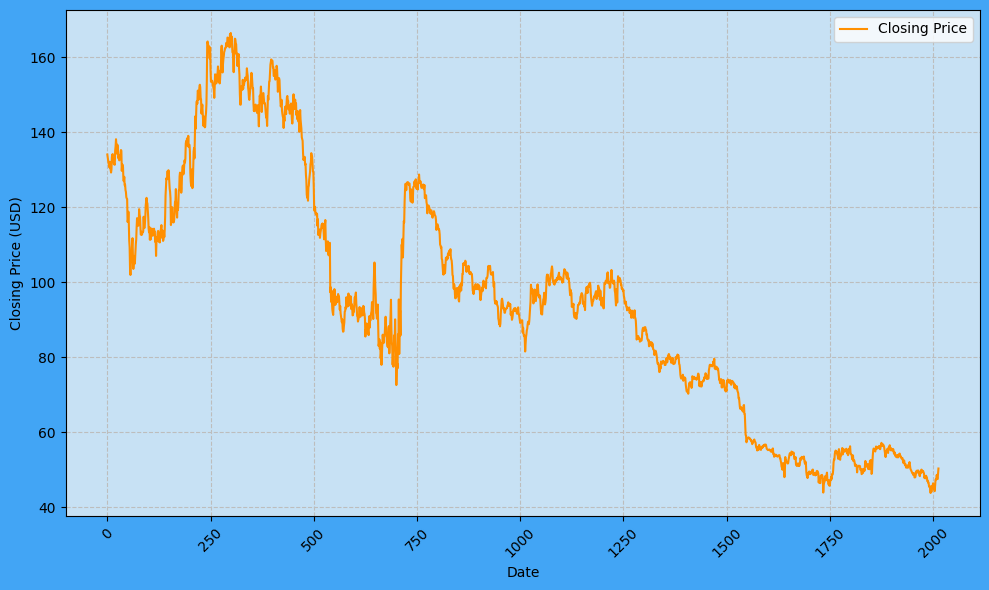

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

fig=plt.figure(figsize=(10,6))
fig.patch.set_facecolor('#42A5F5')

ax=plt.axes()
ax.set_facecolor('#C7E1F4')

plt.plot(df.Close, '#FF8F00', label='Closing Price')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.xticks(rotation=45)

plt.grid(True,linestyle='--',color='#BDBDBD')
plt.tight_layout()
plt.show()

In [8]:
df

,Open,High,Low,Close,Volume
0,132.8100,134.3300,132.4400,134.1000,9.292519e+06
1,132.9300,133.2700,132.3100,133.2200,6.585228e+06
2,131.8500,133.4100,131.0100,132.4600,8.827738e+06
3,131.5700,132.2200,130.5500,131.7400,5.410991e+06
4,130.5800,131.4400,129.6400,131.2800,5.091905e+06
...,...,...,...,...,...
2009,48.2753,49.0259,48.2753,48.6122,2.107993e+07
2010,48.2143,48.2143,47.2329,47.5512,2.961840e+07
2011,48.8155,48.9040,46.9735,47.4804,3.611625e+07
2012,49.9581,50.1369,48.4845,48.7429,2.496834e+07


In [9]:
# ma100 is created for finding the mean of the 100 values and displaying them.
# for that rolling() function is used.

ma100=df.Close.rolling(100).mean()
ma100

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2009,49.436667
2010,49.377171
2011,49.316465
2012,49.270830


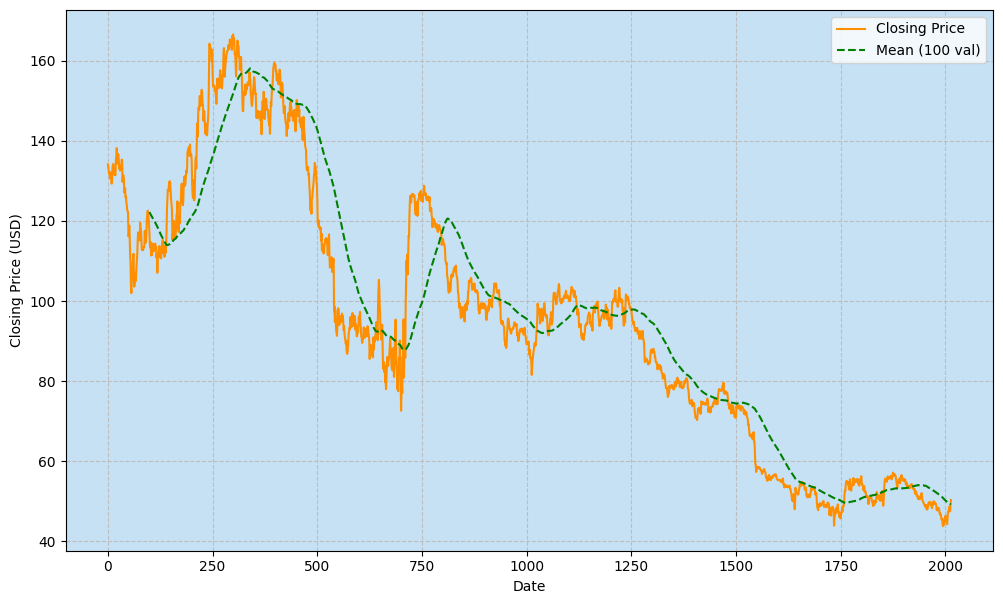

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
fig.patch.set_facecolor('#42A5F5')

ax=plt.axes()
ax.set_facecolor('#C7E1F4')

plt.grid(True,linestyle='--',color='#BDBDBD')
plt.tight_layout()

plt.plot(df.Close, '#FF8F00', label='Closing Price')
plt.plot(ma100,'g--',label='Mean (100 val)') # this is the mean of 100 values

plt.legend()
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.show()

In [11]:
ma200=df.Close.rolling(200).mean()
ma200

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2009,51.394638
2010,51.372828
2011,51.355301
2012,51.342200


Text(0, 0.5, 'Closing Price (USD)')

<Figure size 1200x600 with 0 Axes>

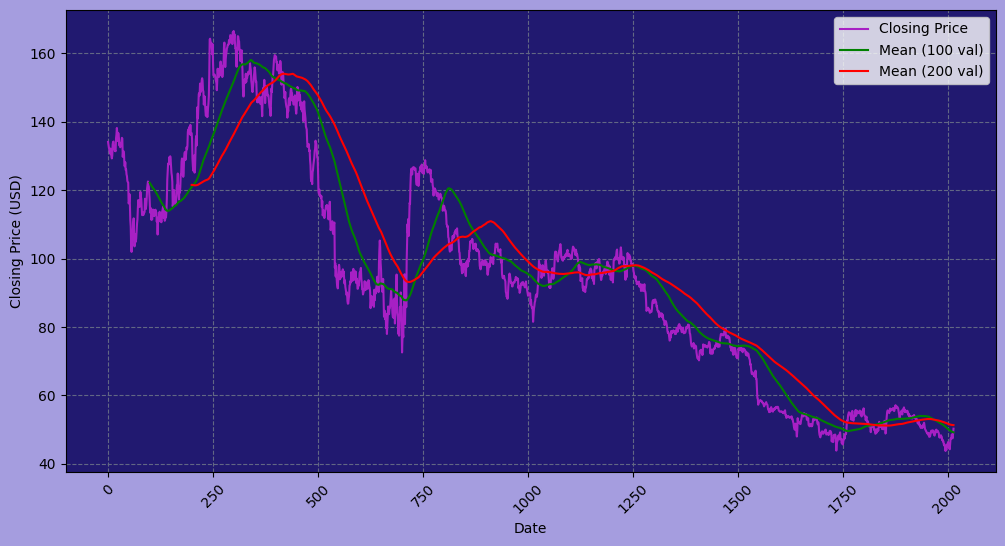

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

ma100=df.Close.rolling(100).mean()
ma100

fig=plt.figure(figsize=(12,6))
fig.patch.set_facecolor('#A59DDF')

ax=plt.axes()
ax.set_facecolor('#211970')

plt.grid(True,linestyle='--',color='#626784')
plt.xticks(rotation=45)

plt.plot(df.Close,'#A720C4',label='Closing Price')
plt.plot(ma100,'g',label='Mean (100 val)') # this is the mean of 100 values
plt.plot(ma200,'r',label='Mean (200 val)') # this is the mean of 200 values

plt.legend()
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')

In [13]:
df.shape

(2014, 5)

In [14]:
# splitting the data into training and testing
import pandas as pd

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print("Used data for training: ", data_training.shape)
print("Used data for testing: ", data_testing.shape)

Used data for training:  (1409, 1)
Used data for testing:  (605, 1)


In [15]:
data_training.head()

,Close
0,134.10
1,133.22
2,132.46
3,131.74
4,131.28


In [16]:
data_testing.head()

,Close
1409,73.0102
1410,73.0024
1411,73.3138
1412,73.3520
1413,72.4482


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.66315807],
       [0.65401605],
       [0.64612067],
       ...,
       [0.00807407],
       [0.        ],
       [0.01556429]])

In [18]:
import numpy as np

# The data is dependant on the previous result. (ma100) and (ma200)
# So, to calculate the next day value we train the following array.
# 100 days are x_train and 101 day is y_train and it goes on changing.

x_train = []
y_train = []


for i in range(100,data_training_array.shape[0]):
  x_train.append(data_training_array[i-100: i])
  y_train.append(data_training_array[i, 0])


x_train

# Now, converting x_train into numpy value, so that it can be provided to LSTM.
x_train,y_train = np.array(x_train), np.array(y_train)

In [19]:
!pip install tensorflow
!pip install tensorflow-addons==0.17.1

!pip install --upgrade tensorflow
!pip install --upgrade tensorflow-addons

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 8.3 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.3.0
    Uninstalling typeguard-4.3.0:
      Successfully uninstalled typeguard-4.3.0
  Attempting uninstall: tensorflow-addons
    Found existing installation: tensorflow-addons 0.17.1
    Uninstalling tensorflow-addons-0.17.1:
      Successfully uninstalled tensorflow-addons-0.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.3.1 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [20]:
import tensorflow as tf

# Use the recommended import path for LSTM
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import tensorflow as tf


In [21]:

# Use the recommended import path for LSTM
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import Orthogonal

# ... rest of your code ...
import tensorflow as tf


model = tf.keras.Sequential()
model.add(LSTM(units=50,
               activation ='relu',
               return_sequences = True,
               input_shape=(x_train.shape[1],1),
                recurrent_initializer="orthogonal"
               )
)
model.add(Dropout(0.2))


# Second Layer
model.add(LSTM(units=60,
               activation ='relu',
               return_sequences = True,
               recurrent_initializer="orthogonal"
               )
)
model.add(Dropout(0.3))



model.add(LSTM(units=80,
               activation ='relu',
               return_sequences = True,
               recurrent_initializer="orthogonal"
               )
)
model.add(Dropout(0.4))



model.add(LSTM(units=120,
               activation ='relu',
               recurrent_initializer="orthogonal"
               )
)
model.add(Dropout(0.5))



# Dense Layer - to connect all the layers
# model.add(Dense(units=1))
model.add(tf.keras.layers.Dense(units=1, kernel_initializer=Orthogonal(gain=1.0, seed=None)))

# Set Optimizer
opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
!pip install tensorflow-addons==0.17.1

!pip install --upgrade tensorflow
!pip install --upgrade tensorflow-addons

  Using cached tensorflow_addons-0.17.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.8 kB)
Using cached tensorflow_addons-0.17.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)
  Attempting uninstall: tensorflow-addons
    Found existing installation: tensorflow-addons 0.23.0
    Uninstalling tensorflow-addons-0.23.0:
      Successfully uninstalled tensorflow-addons-0.23.0
  Using cached tensorflow_addons-0.23.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.8 kB)
Using cached tensorflow_addons-0.23.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (611 kB)
  Attempting uninstall: tensorflow-addons
    Found existing installation: tensorflow-addons 0.17.1
    Uninstalling tensorflow-addons-0.17.1:
      Successfully uninstalled tensorflow-addons-0.17.1


In [24]:
# Try importing AbstractRNNCell from tensorflow.python.keras.layers instead

from tensorflow.python.keras.layers import AbstractRNNCell

# Remove the incorrect import and keep the original correct one
# from tensorflow.python.keras.layers import Dense, Dropout, LSTM, BatchNormalization
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization # This line was already in a previous cell, keep it
from tensorflow.python.keras.callbacks import TensorBoard
from tensorflow.python.keras.callbacks import ModelCheckpoint

from tensorflow.python.keras.initializers import Orthogonal
from tensorflow.python.keras.metrics import MeanSquaredError, MeanAbsoluteError

model.compile(optimizer=opt,
              loss='mean_squared_error',  # Retain MSE for regression
              metrics=['accuracy',  # Include accuracy for reference (optional)
                       MeanSquaredError(),
                       MeanAbsoluteError()])

model.fit(x_train,y_train,epochs=100)

Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 32s 406ms/step - accuracy: 9.1088e-04 - loss: 0.1267 - mean_absolute_error: 0.3256 - mean_squared_error: 0.1632
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 15s 283ms/step - accuracy: 6.0114e-04 - loss: 0.0260 - mean_absolute_error: 0.1976 - mean_squared_error: 0.0722
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 23s 342ms/step - accuracy: 5.3496e-04 - loss: 0.0134 - mean_absolute_error: 0.1532 - mean_squared_error: 0.0474
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 19s 300ms/step - accuracy: 0.0025 - loss: 0.0112 - mean_absolute_error: 0.1306 - mean_squared_error: 0.0364
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 21s 307ms/step - accuracy: 8.4074e-04 - loss: 0.0114 - mean_absolute_error: 0.1183 - mean_squared_error: 0.0305
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 22s 336ms/step - accuracy: 0.0020 - loss: 0.0102 - mean_absolute_error: 0.1103 - mean_squared_error: 0.0268
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 18s 279ms/step - accuracy: 5.2950e-04 - loss: 0.0101 - mean_abs

In [25]:
model.save('keras_model_last.h5')

In [26]:
data_testing.head()


,Close
1409,73.0102
1410,73.0024
1411,73.3138
1412,73.3520
1413,72.4482


In [27]:
data_training.head()

,Close
0,134.10
1,133.22
2,132.46
3,131.74
4,131.28


In [28]:
# We need previous 100 days data and we need to comapre and append the list.
past_100_days = data_training.tail(100)
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [29]:
final_df.head()

,Close
0,84.7661
1,84.4487
2,84.6383
3,82.9240
4,83.0380


In [30]:
input_data = scaler.fit_transform(final_df)
input_data

array([[1.        ],
       [0.99225636],
       [0.99688205],
       [0.95505813],
       [0.95783939],
       [0.97579077],
       [0.98192664],
       [0.96670774],
       [0.97746929],
       [0.98108738],
       [0.95386023],
       [0.97451968],
       [0.96392647],
       [0.936004  ],
       [0.93329592],
       [0.92907523],
       [0.89803725],
       [0.90678605],
       [0.92179026],
       [0.92596216],
       [0.91690108],
       [0.90302402],
       [0.88164241],
       [0.85438843],
       [0.8407041 ],
       [0.84451492],
       [0.83909633],
       [0.8159191 ],
       [0.78720373],
       [0.78958   ],
       [0.82270149],
       [0.81011747],
       [0.85606695],
       [0.83909633],
       [0.84786952],
       [0.84343657],
       [0.85398343],
       [0.86004611],
       [0.85223172],
       [0.85539603],
       [0.85314417],
       [0.83356063],
       [0.83586128],
       [0.83404126],
       [0.86421801],
       [0.87766325],
       [0.87263013],
       [0.850

In [31]:
input_data.shape

(705, 1)

In [32]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i, 0])


In [33]:
x_test,y_test= np.array(x_test),np.array(y_test)

print(x_test.shape)
print(y_test.shape)

(605, 100, 1)
(605,)


In [34]:
# Making Predictions

y_predicted = model.predict(x_test)


19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 217ms/step


In [35]:
y_predicted.shape

(605, 1)

In [36]:
y_test

array([0.71319029, 0.71299999, 0.72059724, 0.72152921, 0.69947912,
       0.70110885, 0.68406992, 0.69046684, 0.76019127, 0.75453603,
       0.74578723, 0.750774  , 0.75642924, 0.7422155 , 0.74954926,
       0.74749015, 0.74954926, 0.74749015, 0.73701404, 0.74868805,
       0.74749015, 0.76019127, 0.77723508, 0.77375849, 0.75791502,
       0.69576589, 0.71719141, 0.69444844, 0.70901838, 0.72368835,
       0.69315052, 0.71402954, 0.72095588, 0.72409578, 0.73039999,
       0.7366554 , 0.73056589, 0.75388951, 0.74784879, 0.75448723,
       0.77922344, 0.76342877, 0.77030631, 0.74207156, 0.74310355,
       0.74518706, 0.74806348, 0.74518706, 0.79993413, 0.81347451,
       0.8333679 , 0.83521476, 0.83068422, 0.82756871, 0.82591459,
       0.83186016, 0.82440441, 0.82855191, 0.83919392, 0.85740879,
       0.84370006, 0.87399636, 0.81213267, 0.80819986, 0.80618954,
       0.82277468, 0.82135965, 0.8202569 , 0.80408163, 0.81038096,
       0.81148371, 0.79019969, 0.76091099, 0.73706283, 0.74123

In [37]:
y_predicted

array([[0.6507219 ],
       [0.66820765],
       [0.68881994],
       [0.70874375],
       [0.7232858 ],
       [0.72620285],
       [0.7184824 ],
       [0.70307505],
       [0.68591374],
       [0.68178195],
       [0.69159305],
       [0.7095405 ],
       [0.72932374],
       [0.74496293],
       [0.75097024],
       [0.74879503],
       [0.7420763 ],
       [0.7350893 ],
       [0.73033756],
       [0.72685766],
       [0.7260396 ],
       [0.72769517],
       [0.73247385],
       [0.7414346 ],
       [0.751511  ],
       [0.7569309 ],
       [0.74705046],
       [0.7282254 ],
       [0.70543826],
       [0.6875113 ],
       [0.6833801 ],
       [0.68772227],
       [0.6966438 ],
       [0.7072221 ],
       [0.71671796],
       [0.7239028 ],
       [0.7287876 ],
       [0.7303643 ],
       [0.73215306],
       [0.73437625],
       [0.73710173],
       [0.7431828 ],
       [0.74932504],
       [0.75372165],
       [0.7514125 ],
       [0.74312055],
       [0.7331781 ],
       [0.726

In [38]:
scaler.scale_

array([0.02439709])

In [39]:
scale_factor=1/0.02105662
y_predicted= y_predicted* scale_factor
y_test = y_test * scale_factor


In [40]:
y_predicted


array([[30.903435 ],
       [31.73385  ],
       [32.71275  ],
       [33.65895  ],
       [34.349567 ],
       [34.488102 ],
       [34.12145  ],
       [33.389736 ],
       [32.57473  ],
       [32.378506 ],
       [32.844448 ],
       [33.69679  ],
       [34.636314 ],
       [35.379036 ],
       [35.66433  ],
       [35.561028 ],
       [35.241947 ],
       [34.910126 ],
       [34.684464 ],
       [34.5192   ],
       [34.480347 ],
       [34.55897  ],
       [34.785915 ],
       [35.21147  ],
       [35.69001  ],
       [35.947407 ],
       [35.478176 ],
       [34.584152 ],
       [33.50197  ],
       [32.6506   ],
       [32.454407 ],
       [32.660618 ],
       [33.084312 ],
       [33.586685 ],
       [34.037655 ],
       [34.37887  ],
       [34.61085  ],
       [34.685734 ],
       [34.770683 ],
       [34.876263 ],
       [35.0057   ],
       [35.294495 ],
       [35.586197 ],
       [35.794994 ],
       [35.685333 ],
       [35.29154  ],
       [34.819363 ],
       [34.49

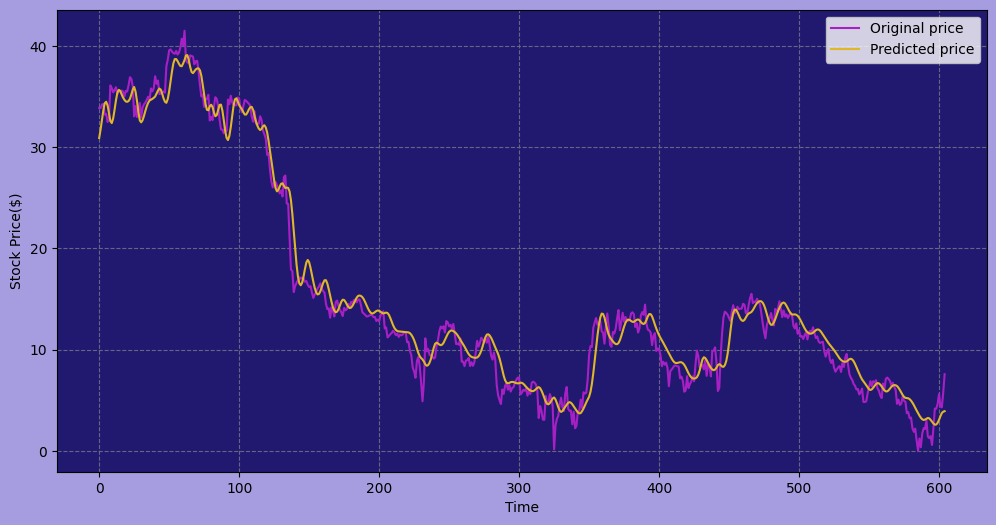

In [41]:
fig=plt.figure(figsize=(12,6))
fig.patch.set_facecolor('#A59DDF')

ax=plt.axes()
ax.set_facecolor('#211970')

plt.grid(True,linestyle='--',color='#626784')
plt.plot(y_test,'#A720C4',label="Original price")
plt.plot(y_predicted,'#DFB729',label="Predicted price")

plt.xlabel('Time')
plt.ylabel('Stock Price($)')
plt.legend()
plt.show()